<a href="https://colab.research.google.com/github/santiagorg2401/tensorflow_exam_prep/blob/main/tf_developer_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Developer Certificate Skills checklist
From https://www.tensorflow.org/static/extras/cert/TF_Certificate_Candidate_Handbook.pdf

## (2) Building and training neural network models using TensorFlow 2.x

### Use TensorFlow 2.x.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, datasets

print(tf.__version__)

SEED = 42
TEST_SIZE = 0.2
BATCH_SIZE = 32

2.15.0


### Preprocess data to get it ready for use in a model.

In [76]:
# Get data
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

# Preprocess dataset using normalization and one-hot encoding
NORMALIZATION_COLUMNS = [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12]
ONEHOT_ENCODER_COLUMNS = [3, 8]

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(), NORMALIZATION_COLUMNS),
    (OneHotEncoder(handle_unknown="ignore"), ONEHOT_ENCODER_COLUMNS)
)

ct.fit(X_train)

X_train_processed = ct.transform(X_train)
X_test_processed = ct.transform(X_test)

m = f"""Dataset info
Shape:
X_train: {X_train.shape}
y_train: {y_train.shape}
X_train_processed: {X_train_processed.shape}

X_test: {X_test.shape}
X_test_processed: {X_test_processed.shape}
y_test: {y_test.shape}"""
print(m)

Dataset info
Shape:
X_train: (404, 13)
y_train: (404,)
X_train_processed: (404, 22)

X_test: (102, 13)
X_test_processed: (102, 22)
y_test: (102,)


### Build, compile and train machine learning (ML) models using TensorFlow

In [77]:
EPOCHS = 100
tf.random.set_seed(SEED)

model_0 = tf.keras.Sequential([
    layers.Input(shape=(22,), name="input_layer"),
    layers.Dense(8),
    layers.Dense(16),
    layers.Dense(1, name="output_layer")
], name="model_0")

model_0.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

model_0_history = model_0.fit(X_train_processed,
                              y_train,
                              epochs=EPOCHS,
                              validation_data=(X_test_processed, y_test),
                              verbose=0)
model_0.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 184       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model_0.evaluate(X_test_processed, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.5244 - mae: 3.5244


[3.5244364738464355, 3.5244364738464355]

### Use models to predict results.

In [79]:
model_0_preds = model_0.predict(X_test_processed)
model_0_preds[:10]

4/4 [==============================] - 0s 1ms/step


array([[ 8.310234],
       [18.373339],
       [21.10633 ],
       [29.179293],
       [24.352463],
       [18.860052],
       [29.060818],
       [22.77197 ],
       [19.83781 ],
       [19.600126]], dtype=float32)

### Build sequential models with multiple layers

In [80]:
EPOCHS = 100
tf.random.set_seed(SEED)

inputs = layers.Input(shape=(22,), name="input_layer")
x = layers.Dense(8)(inputs)
x = layers.Dense(16)(x)
outputs = layers.Dense(1)(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

model_1_history = model_1.fit(X_train_processed,
                              y_train,
                              epochs=EPOCHS,
                              validation_data=(X_test_processed, y_test),
                              verbose=0)
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 22)]              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 184       
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model_1.evaluate(X_test_processed, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 3.6529 - mae: 3.6529


[3.65287184715271, 3.65287184715271]

### Build and train models for binary classification.

In [82]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Set up constants
EPOCHS = 100
DIMENSIONALITY = 30

# Get breast cancer toy dataset from Sklearn
(X, y) = load_breast_cancer(return_X_y=True)

# Preprocess and split datasets
ct = make_column_transformer(
    (MinMaxScaler(), np.arange(0, DIMENSIONALITY))
)

ct.fit(X)
X_processed = ct.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    shuffle=True,
                                                    random_state=SEED)

# Print dataset info
m = f"""Dataset info
Shape:
X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}"""
print(m)

# Build a binary classification model
tf.random.set_seed(SEED)
model_2 = tf.keras.Sequential([
    layers.Input(shape=(DIMENSIONALITY,), name="input_layer"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_2")

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_2_history = model_2.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=EPOCHS,
                              verbose=0)

model_2.summary()

Dataset info
Shape:
X_train: (455, 30)
y_train: (455,)

X_test: (114, 30)
y_test: (114,)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               3968      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 37121 (145.00 KB)
Trainable params: 37121 (145.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9561


[0.14894288778305054, 0.9561403393745422]

In [84]:
tf.round(model_2.predict(X_test))[:10]

4/4 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

### Build and train models for multi-class categorization.

In [85]:
from sklearn.datasets import load_iris

# Set up constants
EPOCHS = 100
DIMENSIONALITY = 4
NUM_CLASSES = 3

# Get Iris dataset from Sklearn
(X, y) = load_iris(return_X_y=True)

# Preprocess and split dataset
ct = make_column_transformer(
    (MinMaxScaler(), np.arange(0, DIMENSIONALITY))
)
ct.fit(X)
X_processed = ct.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    shuffle=True,
                                                    random_state=SEED)

# Print dataset info
m = f"""Dataset info
Shape:
X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}"""
print(m)

# Build a multiclass classification model
inputs = layers.Input(shape=(DIMENSIONALITY,), name="input_layer")
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="output_layer")(x)

tf.random.set_seed(SEED)
model_3 = tf.keras.Model(inputs, outputs, name="model_3")

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_3_history = model_3.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=EPOCHS,
                              verbose=0)
model_3.summary()

Dataset info
Shape:
X_train: (120, 4)
y_train: (120,)

X_test: (30, 4)
y_test: (30,)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 66947 (261.51 KB)
Trainable params: 66947 (261.51 KB)
Non-trainable params: 0 (0.00 Byte)
__

In [86]:
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 0.0319 - accuracy: 1.0000


[0.03188132122159004, 1.0]

In [87]:
tf.round(model_3.predict(X_test))[:10]

1/1 [==============================] - 0s 38ms/step


<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)>

### Plot loss and accuracy of a trained model.

In [3]:
import matplotlib.pyplot as plt

def plot_loss_metrics_curves(model_history,
                             metric=None):
  loss = model_history.history["loss"]
  epochs = model_history.epoch

  plt.figure(figsize=(20, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss)
  plt.title("loss curve")

  if metric:
    metrics = model_history.history[metric]
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics)
    plt.title(f"{metric} curve")

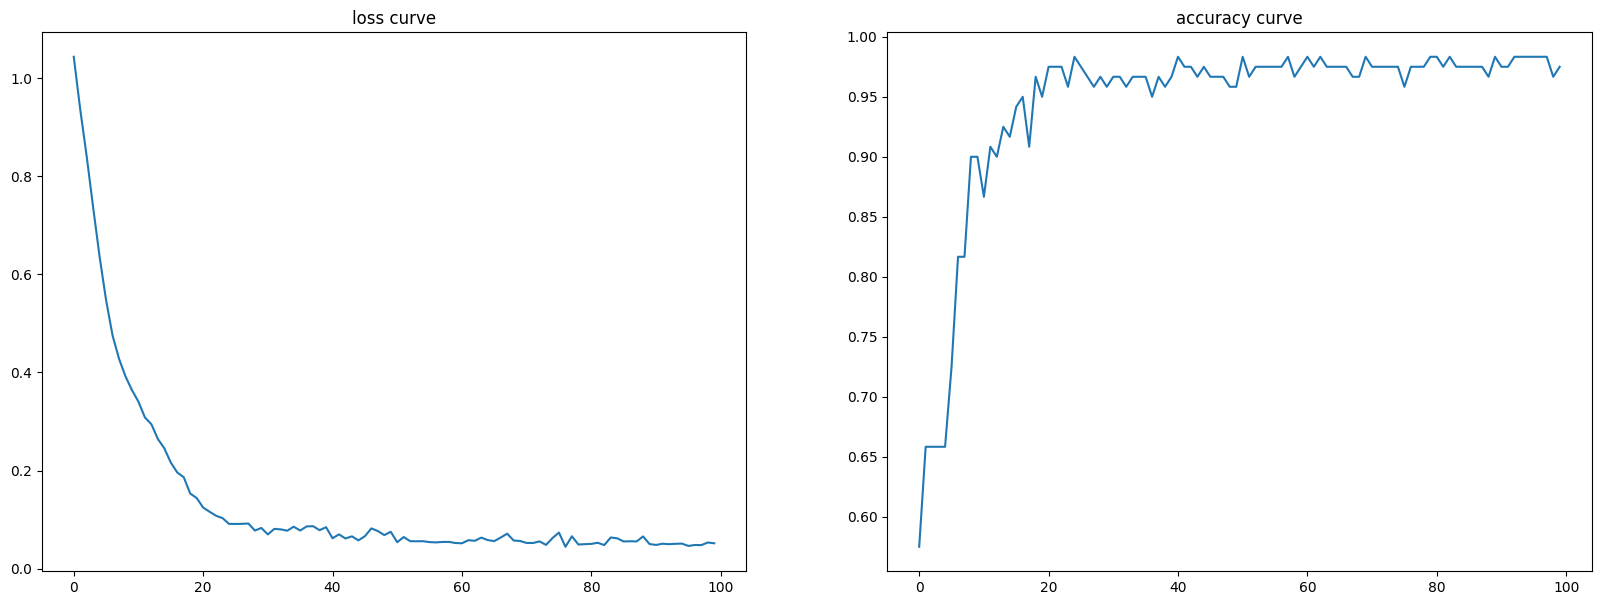

In [89]:
plot_loss_metrics_curves(model_3_history, "accuracy")

 ### Identify strategies to prevent overfitting, including augmentation and dropout.

In [90]:
# Build a multiclass classification model with a drop out layer
inputs = layers.Input(shape=(DIMENSIONALITY,), name="input_layer")
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="output_layer")(x)

tf.random.set_seed(SEED)
model_4 = tf.keras.Model(inputs, outputs, name="model_4")

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_4_history = model_3.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=EPOCHS,
                              verbose=0)
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 dense_11 (Dense)            (None, 128)               640       
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 66947 (261.51 KB)
Trainable params: 66947 (26

In [91]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 129ms/step - loss: 1.0872 - accuracy: 0.7000


[1.0872355699539185, 0.699999988079071]

## (3) Image classification

### Use datasets from different sources

In [21]:
# Use sign language MNIST from Kaggle
! pip install -q kaggle
! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d datamunge/sign-language-mnist
! mkdir sign-language-mnist
! unzip sign-language-mnist.zip -d sign-language-mnist

mkdir: cannot create directory ‘/home/santiagorg2401/.kaggle’: File exists
 93%|███████████████████████████████████▏  | 58.0M/62.6M [00:02<00:00, 23.7MB/s]
100%|██████████████████████████████████████| 62.6M/62.6M [00:02<00:00, 27.0MB/s]
mkdir: cannot create directory ‘sign-language-mnist’: File exists
Archive:  sign-language-mnist.zip
  inflating: sign-language-mnist/amer_sign2.png  
  inflating: sign-language-mnist/amer_sign3.png  
  inflating: sign-language-mnist/american_sign_language.PNG  
  inflating: sign-language-mnist/sign_mnist_test.csv  
  inflating: sign-language-mnist/sign_mnist_test/sign_mnist_test.csv  
  inflating: sign-language-mnist/sign_mnist_train.csv  
  inflating: sign-language-mnist/sign_mnist_train/sign_mnist_train.csv  


### Use datasets in different formats, including json and csv.

(-0.5, 27.5, 27.5, -0.5)

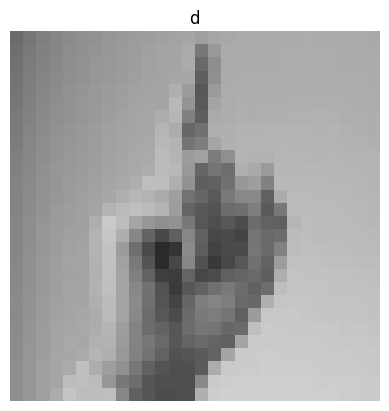

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

X_train = train_df.drop(["label"], axis=1)
y_train = train_df["label"].to_numpy()
X_test = test_df.drop(["label"], axis=1)
y_test = test_df["label"].to_numpy()

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

X_train = np.repeat(X_train, 3, -1)
X_test = np.repeat(X_test, 3, -1)

class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
               'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q',
               'r', 's', 't', 'u', 'v', 'w', 'x', 'y']

plt.imshow(X_train[0], cmap="gray")
plt.title(class_names[y_train[0]])
plt.axis(False)

### Use datasets from tf.data.datasets

In [23]:
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### Use pretrained models (transfer learning).

In [24]:
!pip install --upgrade tensorflow_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.7 MB/s eta 0:00:00


In [25]:
import tensorflow_hub as hub
model_5 = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v1/frameworks/TensorFlow2/variations/025-128-classification/versions/2",
                   trainable=False,
                   name="feature_extraction")
], name="model_5")
model_5.build([None, 28, 28, 3])

### Extract features from pre-trained models.

In [26]:
model_5.add(layers.Dense(25, activation="softmax", name="output_layer"))

### Ensure that inputs to a model are in the correct shape.

In [27]:
# Print dataset info
m = f"""Dataset info
Shape:
X_train: {X_train.shape}
y_train: {y_train.shape}
"""
print(m)

Dataset info
Shape:
X_train: (27455, 28, 28, 3)
y_train: (27455,)



### Ensure that you can match test data to the input shape of a neural network

In [28]:
# Print dataset info
m = f"""Dataset info
Shape:
X_test: {X_test.shape}
y_test: {y_test.shape}
"""
print(m)

Dataset info
Shape:
X_test: (7172, 28, 28, 3)
y_test: (7172,)



### Ensure you can match output data of a neural network to specified input shape for test data

In [30]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction (KerasL  (None, 1001)              475801    
 ayer)                                                           
                                                                 
 output_layer (Dense)        (None, 25)                25050     
                                                                 
Total params: 500851 (1.91 MB)
Trainable params: 25050 (97.85 KB)
Non-trainable params: 475801 (1.82 MB)
_________________________________________________________________


### Understand batch loading of data.

In [31]:
X_train_ = tf.data.Dataset.from_tensor_slices(X_train)
y_train_ = tf.data.Dataset.from_tensor_slices(y_train)
X_test_ = tf.data.Dataset.from_tensor_slices(X_test)
y_test_ = tf.data.Dataset.from_tensor_slices(y_test)

X_train_ = X_train_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
y_train_ = y_train_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
X_test_ = X_test_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
y_test_ = y_test_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train = tf.data.Dataset.zip((X_train_, y_train_))
test = tf.data.Dataset.zip((X_test_, y_test_))

train, test

2024-02-07 12:53:16.265121: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 516593280 exceeds 10% of free system memory.
2024-02-07 12:53:16.805083: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 516593280 exceeds 10% of free system memory.
2024-02-07 12:53:17.128680: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134948352 exceeds 10% of free system memory.
2024-02-07 12:53:17.264671: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134948352 exceeds 10% of free system memory.


(<_ZipDataset element_spec=(TensorSpec(shape=(None, 28, 28, 3), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_ZipDataset element_spec=(TensorSpec(shape=(None, 28, 28, 3), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

### Use callbacks to trigger the end of training cycles.

In [32]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=7, verbose=1)]

### Additional: train feature extraction model

In [33]:
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_5_history = model_5.fit(train,
                              epochs=20,
                              validation_data=test,
                              verbose=1,
                              callbacks=callbacks)

2024-02-07 12:53:18.318510: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 516593280 exceeds 10% of free system memory.


Epoch 1/20


2024-02-07 12:53:19.674018: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


858/858 [==============================] - 5s 4ms/step - loss: 2.7242 - accuracy: 0.2043 - val_loss: 2.6018 - val_accuracy: 0.1870
Epoch 2/20
858/858 [==============================] - 3s 4ms/step - loss: 2.4659 - accuracy: 0.2674 - val_loss: 2.5885 - val_accuracy: 0.2030
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 2.3935 - accuracy: 0.2860 - val_loss: 2.5955 - val_accuracy: 0.2124
Epoch 4/20
858/858 [==============================] - 3s 4ms/step - loss: 2.3523 - accuracy: 0.2973 - val_loss: 2.6066 - val_accuracy: 0.2132
Epoch 5/20
858/858 [==============================] - 3s 4ms/step - loss: 2.3252 - accuracy: 0.3053 - val_loss: 2.6185 - val_accuracy: 0.2161
Epoch 6/20
858/858 [==============================] - 3s 4ms/step - loss: 2.3059 - accuracy: 0.3104 - val_loss: 2.6300 - val_accuracy: 0.2164
Epoch 7/20
858/858 [==============================] - 3s 3ms/step - loss: 2.2915 - accuracy: 0.3142 - val_loss: 2.6408 - val_accuracy: 0.2167
Epoch 8/20
858/85

In [34]:
model_5.evaluate(test)

225/225 [==============================] - 1s 2ms/step - loss: 2.6603 - accuracy: 0.2188


[2.6602725982666016, 0.2187674343585968]

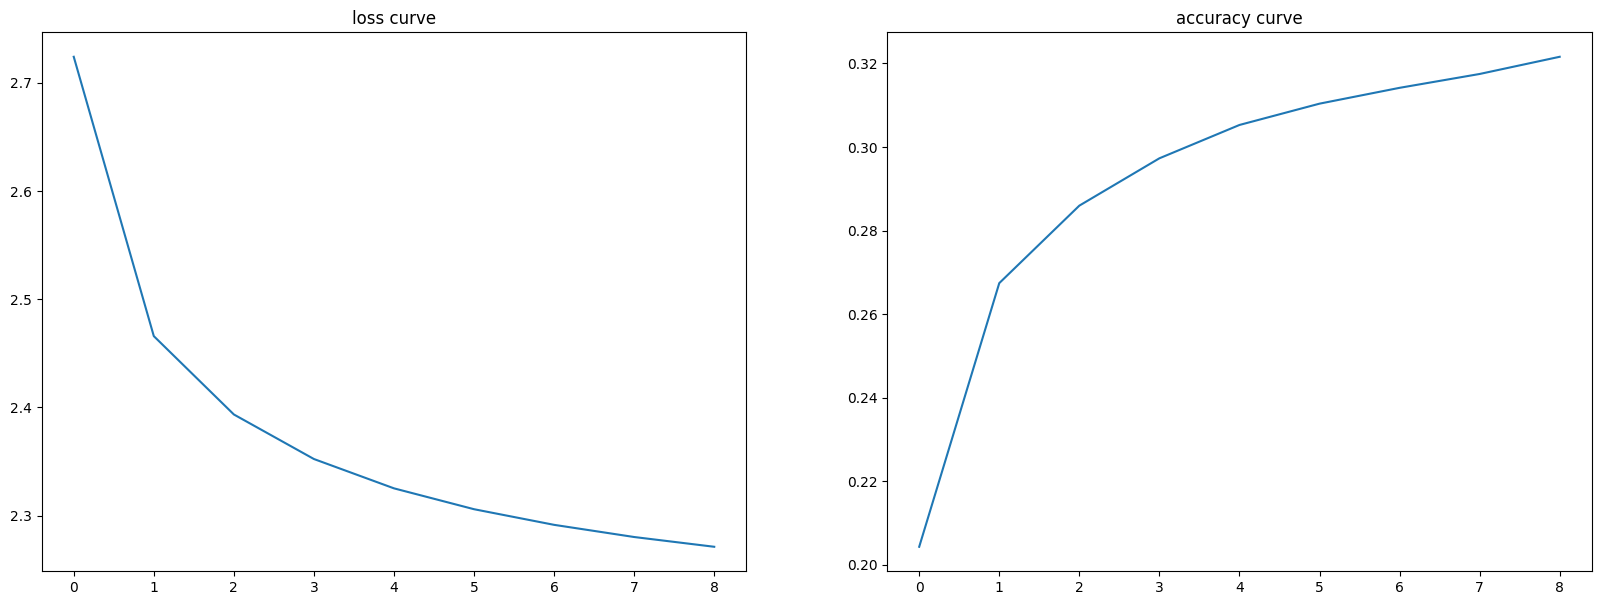

In [35]:
plot_loss_metrics_curves(model_5_history, "accuracy")

### Define Convolutional neural networks with Conv2D and pooling layers.

In [55]:
input = layers.Input(shape=(28, 28, 3,), name="input_layer")
x = layers.Normalization()(input)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
output = layers.Dense(25, activation="softmax")(x)

model_6 = tf.keras.Model(input, output, name="model_6")

### Build and train models to process real-world image datasets.

In [56]:
tf.random.set_seed(SEED)
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_6_history = model_6.fit(train,
                              validation_data=test,
                              epochs=10,
                              callbacks=callbacks,
                              verbose=0)
model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 3)]       0         
                                                                 
 normalization_4 (Normaliza  (None, 28, 28, 3)         7         
 tion)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 10)        280       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 10)        910 

In [57]:
model_6.evaluate(test)

225/225 [==============================] - 0s 2ms/step - loss: 3.2096 - accuracy: 0.0201


[3.209566593170166, 0.020078081637620926]

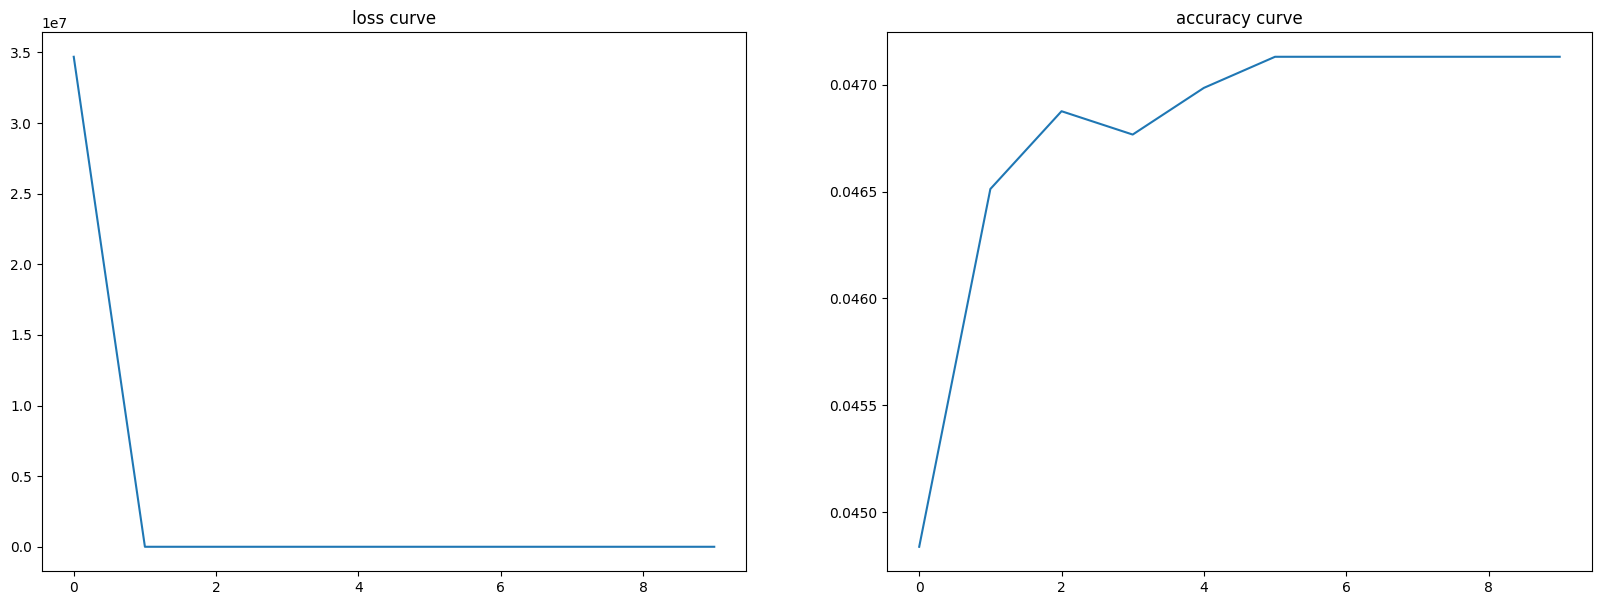

In [58]:
plot_loss_metrics_curves(model_6_history, "accuracy")

### Understand how to use convolutions to improve your neural network

### Use real-world images in different shapes and sizes..

In [40]:
! wget https://www.signingsavvy.com/images/words/alphabet/2/a1.jpg

--2024-02-07 12:54:20--  https://www.signingsavvy.com/images/words/alphabet/2/a1.jpg
Resolving www.signingsavvy.com (www.signingsavvy.com)... 72.52.133.7
Connecting to www.signingsavvy.com (www.signingsavvy.com)|72.52.133.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28578 (28K) [image/jpeg]
Saving to: ‘a1.jpg’

a1.jpg              100%[===================>]  27.91K  --.-KB/s    in 0.1s    

2024-02-07 12:54:21 (252 KB/s) - ‘a1.jpg’ saved [28578/28578]



In [42]:
! pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 39.3 MB/s eta 0:00:00


1/1 [==============================] - 0s 50ms/step


Text(0.5, 1.0, 'Prediction: s')

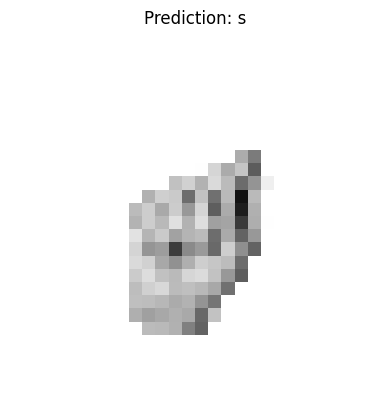

In [59]:
import cv2
img = tf.keras.utils.load_img("a1.jpg",
                              grayscale=True,
                              target_size=(28, 28))

img_arr = tf.keras.utils.img_to_array(img)
rgb_image = np.empty((28, 28, 3), dtype=np.uint8)

# Fill the RGB image with the grayscale intensity
rgb_image[:,:,0] = img_arr[:,:,0]
rgb_image[:,:,1] = img_arr[:,:,0]
rgb_image[:,:,2] = img_arr[:,:,0]

rgb_image = np.array([rgb_image/255.])
plt.imshow(rgb_image[0], cmap="gray")
plt.axis(False)

pred = model_6.predict(rgb_image)
plt.title(f"Prediction: {class_names[pred.argmax()]}")

### Use image augmentation to prevent overfitting.

(TensorShape([28, 28, 3]), (640, 640, 3))

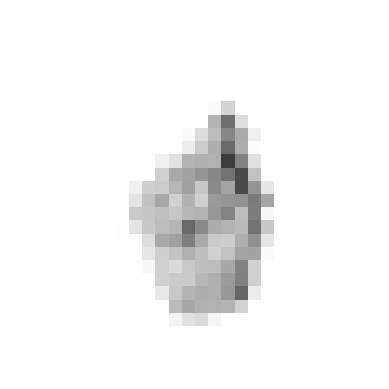

In [60]:
data_augmentation_layer = tf.keras.Sequential([
    layers.Resizing(28, 28),
    layers.Rescaling(1/255.),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

img = tf.keras.utils.load_img("a1.jpg",
                              grayscale=True)
img_arr = tf.keras.utils.img_to_array(img)
img_arr = np.repeat(img_arr, 3, -1)

img_aug = data_augmentation_layer(img_arr)
plt.imshow(img_aug, cmap="gray")
plt.axis(False)

img_aug.shape, img_arr.shape

### Use ImageDataGenerator.

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
test = test_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE)

In [62]:
input = layers.Input(shape=(28, 28, 3,), name="input_layer")
x = data_augmentation_layer(input)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
output = layers.Dense(25, activation="softmax")(x)

model_7 = tf.keras.Model(input, output, name="model_7")

tf.random.set_seed(SEED)
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_7_history = model_7.fit(train,
                              validation_data=test,
                              epochs=10,
                              callbacks=callbacks,
                              verbose=0)
model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 3)]       0         
                                                                 
 sequential (Sequential)     (28, 28, 3)               0         
                                                                 
 conv2d_20 (Conv2D)          (None, 26, 26, 10)        280       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 10)        910       
                                                           

In [63]:
model_7.evaluate(test)

225/225 [==============================] - 0s 2ms/step - loss: 2.2208 - accuracy: 0.2821


[2.2207536697387695, 0.2820691466331482]

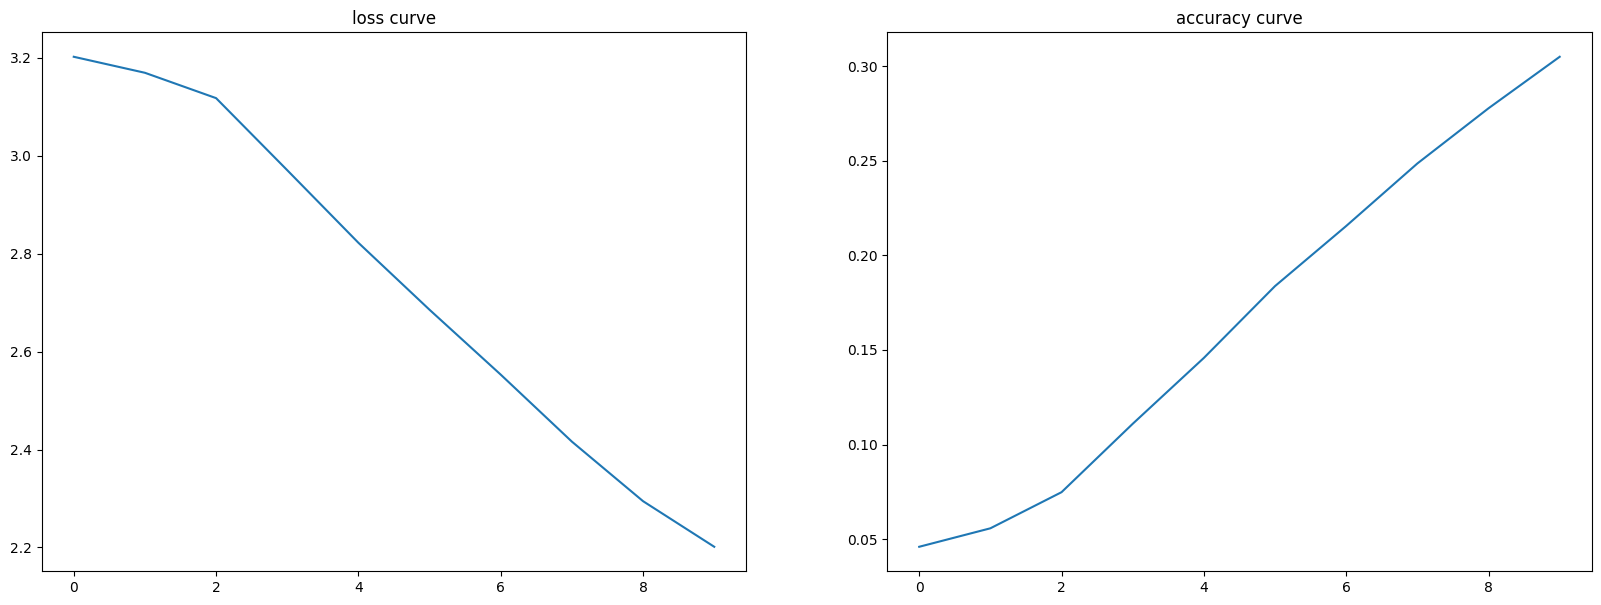

In [64]:
plot_loss_metrics_curves(model_7_history, "accuracy")

1/1 [==============================] - 0s 52ms/step


Text(0.5, 1.0, 'Prediction: r')

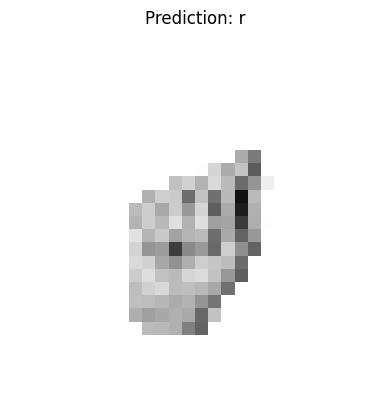

In [65]:
plt.imshow(rgb_image[0], cmap="gray")
plt.axis(False)

pred = model_7.predict(rgb_image)
plt.title(f"Prediction: {class_names[pred.argmax()]}")

### Understand how ImageDataGenerator labels images based on the directory structure.

## (4) Natural language processing (NLP)

### Prepare text to use in TensorFlow models

In [2]:
# Use Emotions dataset from Kaggle
! pip install -q kaggle
! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d nelgiriyewithana/emotions
! mkdir emotions
! unzip emotions.zip -d emotions

mkdir: cannot create directory ‘/home/santiagorg2401/.kaggle’: File exists
emotions.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘emotions’: File exists
Archive:  emotions.zip
replace emotions/text.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
import pandas as pd
emotions_df = pd.read_csv("emotions/text.csv")
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [6]:
from sklearn.model_selection import train_test_split
# Shuffle and split training and test sets
train_df, test_df = train_test_split(emotions_df,
                                     test_size=TEST_SIZE,
                                     random_state=SEED)

X_train = train_df["text"].to_numpy()
y_train = train_df["label"].to_numpy()
X_test = test_df["text"].to_numpy()
y_test = test_df["label"].to_numpy()

# One hot encode labels
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse_output=False)
# y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
# y_test = one_hot_encoder.transform(y_test.reshape(-1, 1))

# Use the data API to fast up performance
X_train_ = tf.data.Dataset.from_tensor_slices(X_train)
y_train_ = tf.data.Dataset.from_tensor_slices(y_train)
X_test_ = tf.data.Dataset.from_tensor_slices(X_test)
y_test_ = tf.data.Dataset.from_tensor_slices(y_test)

X_train_ = X_train_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
y_train_ = y_train_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
X_test_ = X_test_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
y_test_ = y_test_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train = tf.data.Dataset.zip((X_train_, y_train_))
test = tf.data.Dataset.zip((X_test_, y_test_))

train_df.head()

2024-02-07 14:50:47.945549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-07 14:50:47.993413: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-07 14:50:47.993692: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

,Unnamed: 0,text,label
146122,146122,ive blabbed on enough for tonight im tired and...,0
334806,334806,i woke up really early this morning and drove ...,1
182273,182273,i feel i never gave myself a rest day after th...,3
198898,198898,i am feeling restless teary flat sad and stran...,4
80779,80779,i feel like im doomed before ive even began,0


In [7]:
m = f"""Dataset info
Shape:
X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}"""
print(m)

train_df.label.value_counts(), test_df.label.value_counts()

Dataset info
Shape:
X_train: (333447,)
y_train: (333447,)

X_test: (83362,)
y_test: (83362,)


(label
 1    112903
 0     96986
 3     45876
 4     38118
 2     27625
 5     11939
 Name: count, dtype: int64,
 label
 1    28164
 0    24201
 3    11441
 4     9594
 2     6929
 5     3033
 Name: count, dtype: int64)

### Build natural language processing systems using TensorFlow.

In [9]:
from collections import Counter
import re

def count_unique_words(X_train):
    # Define a Counter object to store word counts
    word_counter = Counter()

    # Tokenize each sentence and update word counts
    for sentence in X_train:
        # Tokenize the sentence by splitting on whitespace and punctuation
        words = re.findall(r'\b\w+\b', sentence.lower())  # Use regex to find words

        # Update word counts in the Counter object
        word_counter.update(words)

    # Return the Counter object containing unique word counts
    return word_counter

# Example usage:
total_unique_words = count_unique_words(X_train)

# Print the total number of unique words
print("Total number of unique words:", len(total_unique_words))

Total number of unique words: 67949


In [8]:
# Use tokenization to process the datasets
max_vocab_length = 30000
mean_sentence_length = round(sum([len(i.split()) for i in X_train])/len(X_train))

text_vectorizer = layers.TextVectorization(max_tokens=max_vocab_length,
                                           output_mode="int",
                                           output_sequence_length=mean_sentence_length)
text_vectorizer.adapt(X_train)

### Use word embeddings in your TensorFlow model.

In [9]:
OUT_DIM = 128
text_embeddings = layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=OUT_DIM,
                                   input_length=mean_sentence_length)

### Build models that identify the category of a piece of text using binary categorization

In [12]:
# Create a small subset of the dataset containing only 2 classes, sadness or joy
train_df_sub = train_df[train_df.label <= 1]
test_df_sub = test_df[test_df.label <= 1]

X_train_sub = train_df_sub["text"].to_numpy()
y_train_sub = train_df_sub["label"].to_numpy()
X_test_sub = test_df_sub["text"].to_numpy()
y_test_sub = test_df_sub["label"].to_numpy()

m = f"""Dataset info
Shape:
X_train_sub: {X_train_sub.shape}
y_train_sub: {y_train_sub.shape}

X_test_sub: {X_test_sub.shape}
y_test_sub: {y_test_sub.shape}"""
print(m)

# Use the data API to fast up performance
X_train_sub_ = tf.data.Dataset.from_tensor_slices(X_train_sub)
y_train_sub_ = tf.data.Dataset.from_tensor_slices(y_train_sub)
X_test_sub_ = tf.data.Dataset.from_tensor_slices(X_test_sub)
y_test_sub_ = tf.data.Dataset.from_tensor_slices(y_test_sub)

X_train_sub_ = X_train_sub_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
y_train_sub_ = y_train_sub_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
X_test_sub_ = X_test_sub_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
y_test_sub_ = y_test_sub_.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_sub = tf.data.Dataset.zip((X_train_sub_, y_train_sub_))
test_sub = tf.data.Dataset.zip((X_test_sub_, y_test_sub_))

# Use tokenization and embeddings
max_vocab_length_sub = 10000
mean_sequence_length_sub = round(sum([len(i.split()) for i in X_train_sub])/len(X_train_sub))

text_vectorizer_sub = layers.TextVectorization(max_tokens=max_vocab_length_sub,
                                               output_mode="int",
                                               output_sequence_length=mean_sequence_length_sub)

text_embeddings_sub = layers.Embedding(input_dim=max_vocab_length_sub,
                                   output_dim=OUT_DIM,
                                   input_length=mean_sequence_length_sub)


text_vectorizer_sub.adapt(X_train_sub)
train_df_sub.label.value_counts(), test_df_sub.label.value_counts()

Dataset info
Shape:
X_train_sub: (209889,)
y_train_sub: (209889,)

X_test_sub: (52365,)
y_test_sub: (52365,)


(label
 1    112903
 0     96986
 Name: count, dtype: int64,
 label
 1    28164
 0    24201
 Name: count, dtype: int64)

In [13]:
# Build a binary classification NLP model
inputs = layers.Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer_sub(inputs)
x = text_embeddings_sub(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid", name="ouput_layer")(x)
model_8 = tf.keras.Model(inputs, outputs, name="model_8")

tf.random.set_seed(SEED)
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3,
                                              verbose=1)]
model_8_history = model_8.fit(train_sub,
                              validation_data=test_sub,
                              epochs=10,
                              verbose=0,
                              callbacks=callbacks)
model_8.summary()

2024-02-07 14:02:22.686925: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-07 14:02:23.669409: I external/local_xla/xla/service/service.cc:168] XLA service 0x7c86a81fc890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-07 14:02:23.669439: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-07 14:02:23.674688: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-07 14:02:23.692221: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1707332543.763340   58552 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 4: early stopping
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 19)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 19, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 ouput_layer (Dense)         (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Tra

In [14]:
model_8.evaluate(test_sub)

1637/1637 [==============================] - 3s 2ms/step - loss: 0.1515 - accuracy: 0.9359


[0.15146780014038086, 0.9359495639801025]

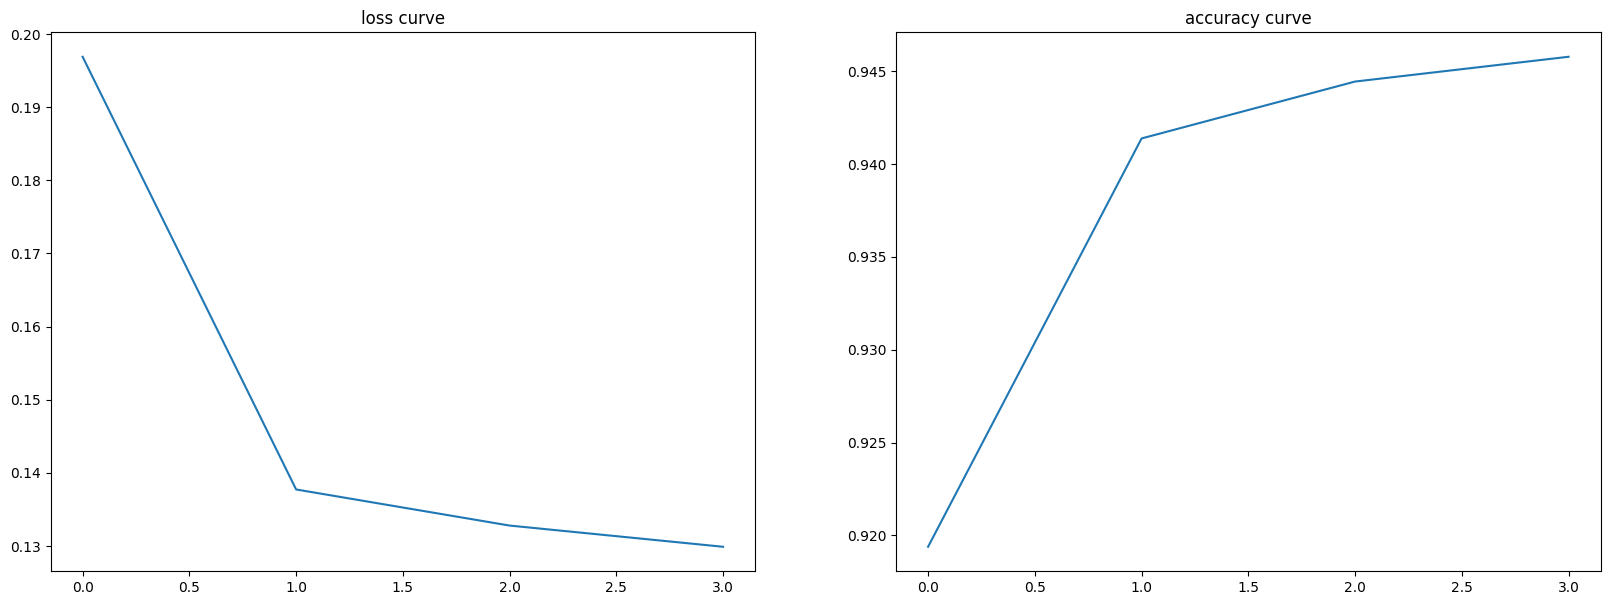

In [15]:
plot_loss_metrics_curves(model_8_history, "accuracy")

### Build models that identify the category of a piece of text using multi-class categorization

In [14]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3,
                                              verbose=1)]

In [75]:
# Build a multiclass classsification NLP model
inputs = layers.Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = text_embeddings(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_9 = tf.keras.Model(inputs, outputs, name="model_9")

tf.random.set_seed(SEED)
model_9.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_9_history = model_9.fit(train,
                              validation_data=test,
                              epochs=10,
                              verbose=0,
                              callbacks=callbacks)
model_9.summary()

Epoch 4: early stopping
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 19)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 19, 128)           3840000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
 1 (GlobalAveragePooling1D)                                      
                                                                 
 output_layer (Dense)        (None, 6)                 774       
                                                                 
Total params: 3840774 (14.65 MB)
Tr

In [76]:
model_9.evaluate(test)

2606/2606 [==============================] - 3s 1ms/step - loss: 0.4478 - accuracy: 0.8318


[0.4478292763233185, 0.8317579030990601]

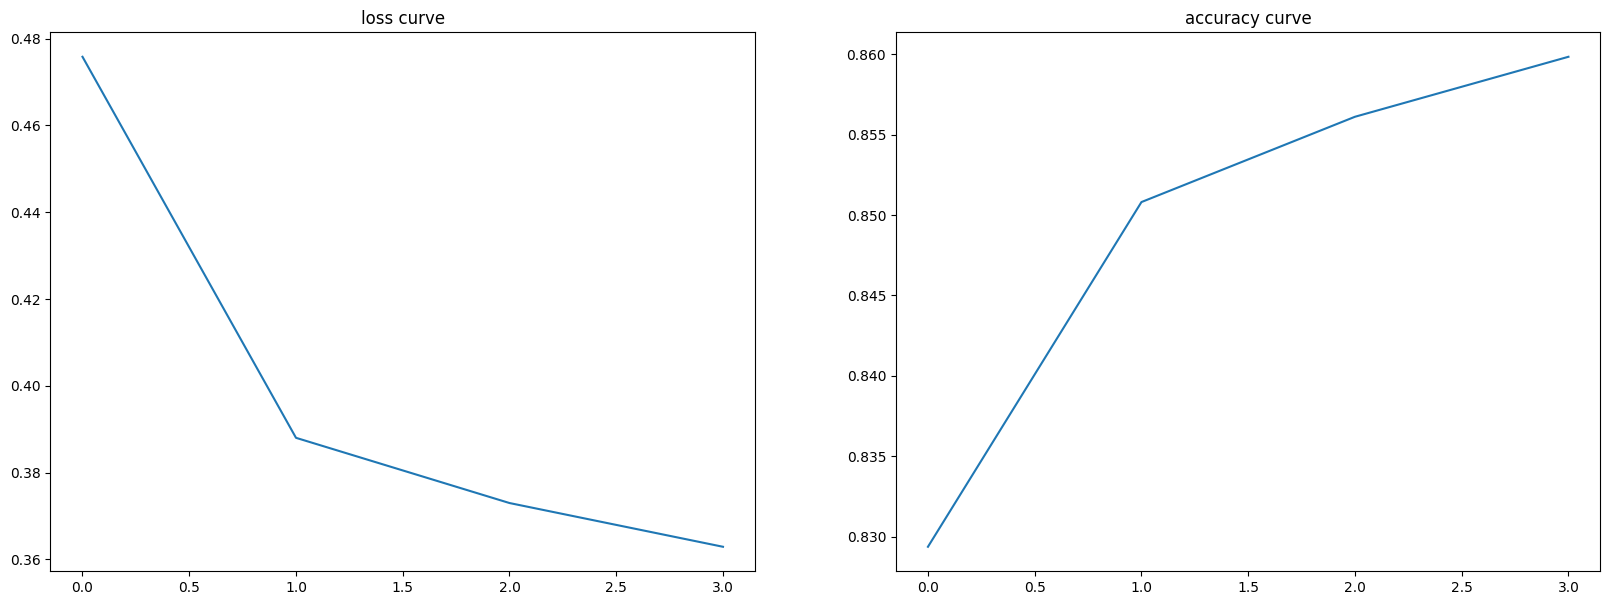

In [77]:
plot_loss_metrics_curves(model_9_history, "accuracy")

###  Use LSTMs in your model to classify text for either binary or multi-class categorization.

In [16]:
# Build a NLP network using LTSTMs for multiclass categorization
inputs = layers.Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = text_embeddings(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_10 = tf.keras.Model(inputs, outputs, name="model_10")

tf.random.set_seed(SEED)
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
model_10_history = model_10.fit(train,
                                validation_data=test,
                                epochs=10,
                                callbacks=callbacks,
                                verbose=0)
model_10.summary()

Epoch 5: early stopping
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 19)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 19, 128)           3840000   
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 output_layer (Dense)        (None, 6)                 390       
                                                                 
Total params: 3889798 (14.84 MB)
Trainable params: 3889798 (14.84 MB)
Non-trainable params: 0 (0.00 

In [17]:
model_10.evaluate(test)

2606/2606 [==============================] - 5s 2ms/step - loss: 0.3804 - accuracy: 0.8527


[0.3803599774837494, 0.8527026772499084]

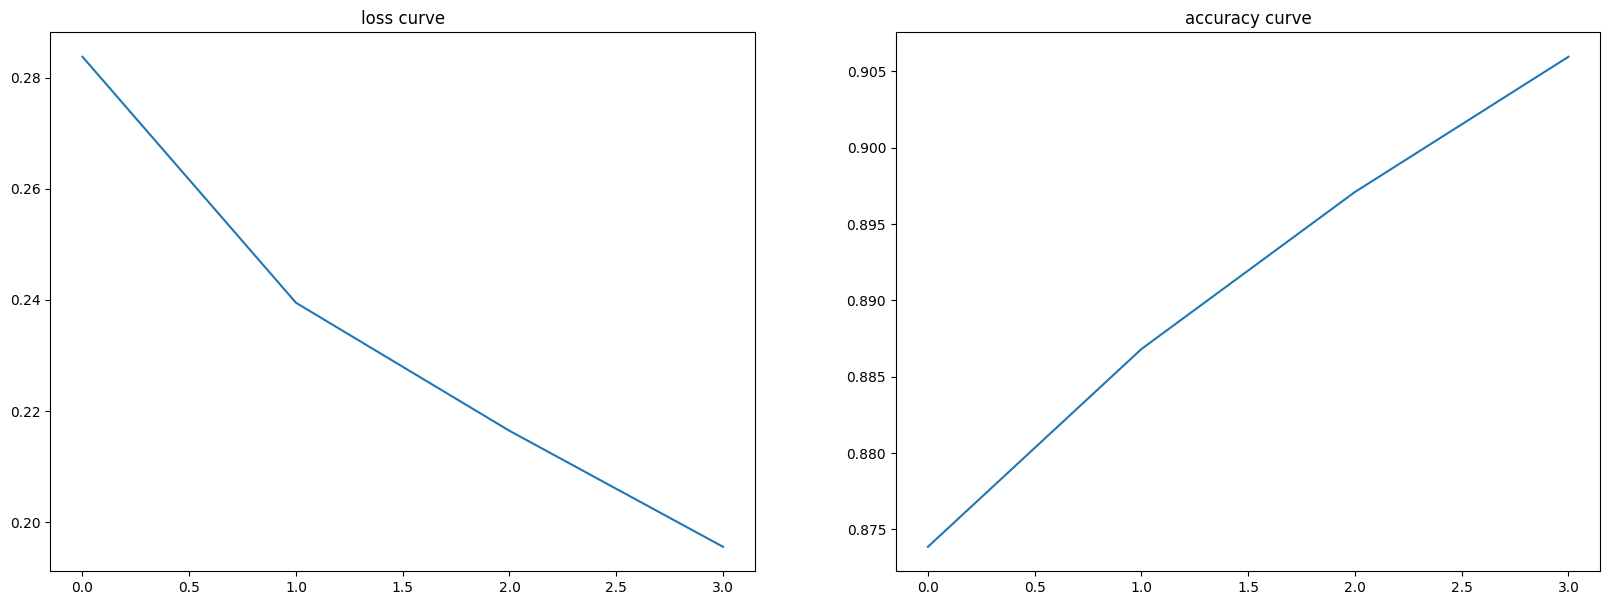

In [82]:
plot_loss_metrics_curves(model_10_history, "accuracy")

### Add RNN and GRU layers to your model.

In [83]:
# Build a NLP network using GRU layers for multiclass categorization
inputs = layers.Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = text_embeddings(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_11 = tf.keras.Model(inputs, outputs, name="model_11")

tf.random.set_seed(SEED)
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
model_11_history = model_11.fit(train,
                                validation_data=test,
                                epochs=10,
                                verbose=0,
                                callbacks=callbacks)
model_11.summary()

Epoch 4: early stopping
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 19)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 19, 128)           3840000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 output_layer (Dense)        (None, 6)                 390       
                                                                 
Total params: 3877638 (14.79 MB)
Trainable params: 3877638 (14.79 MB)
Non-trainable params: 0 (0.00 

In [84]:
model_11.evaluate(test)

2606/2606 [==============================] - 5s 2ms/step - loss: 0.5331 - accuracy: 0.8446


[0.533099889755249, 0.8446294665336609]

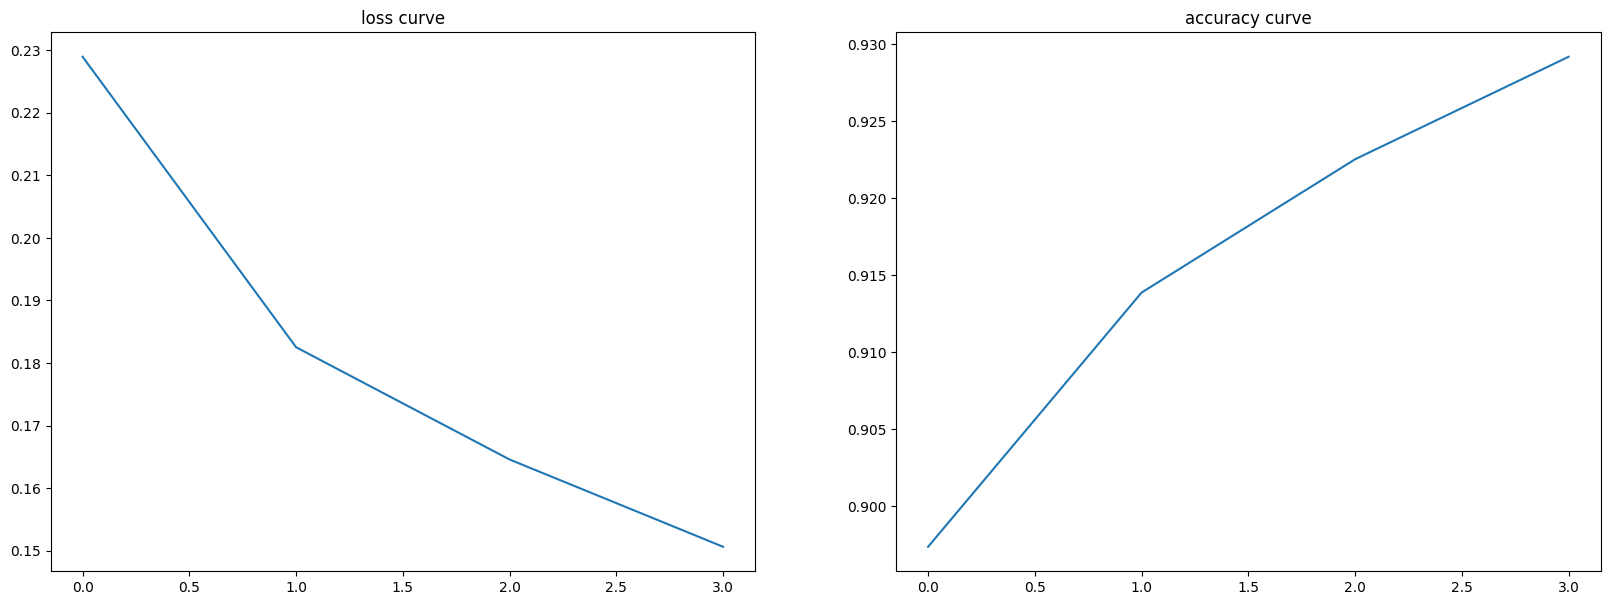

In [85]:
plot_loss_metrics_curves(model_11_history, "accuracy")

### Use RNNS, LSTMs, GRUs and CNNs in models that work with text.


In [23]:
# Build a CNN NLP architecture
inputs = layers.Input(shape=(1,), dtype="string", name="input_layer")
x = text_vectorizer(inputs)
x = text_embeddings(x)
x = layers.Conv1D(32,5, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)
model_12 = tf.keras.Model(inputs, outputs, name="model_12")

tf.random.set_seed(SEED)
model_12.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
model_12_history = model_12.fit(train,
                                validation_data=test,
                                epochs=10,
                                verbose=0)
model_12.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 19)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 19, 128)           3840000   
                                                                 
 conv1d_8 (Conv1D)           (None, 15, 32)            20512     
                                                                 
 global_average_pooling1d_7  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 64)                211

In [24]:
model_12.evaluate(test)

2606/2606 [==============================] - 4s 2ms/step - loss: 1.1595 - accuracy: 0.8247


[1.1595102548599243, 0.8247042894363403]

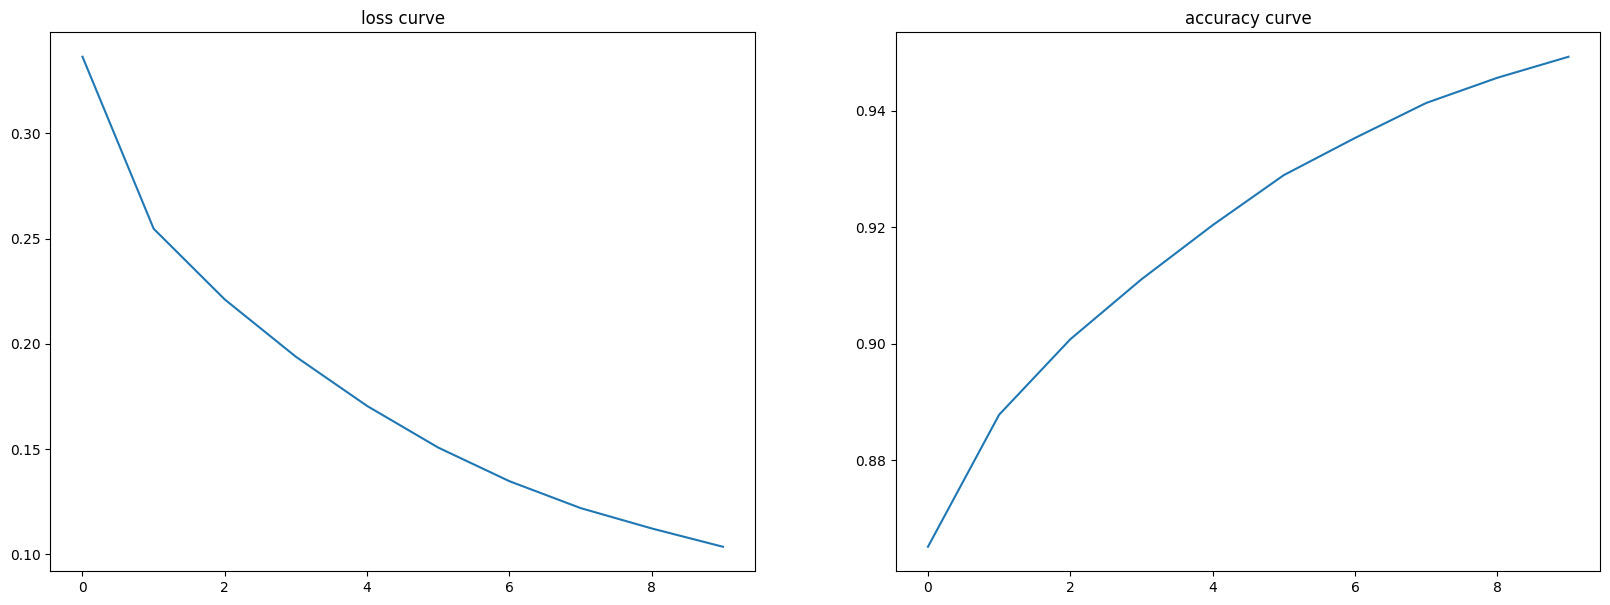

In [25]:
plot_loss_metrics_curves(model_12_history, "accuracy")

### Train LSTMs on existing text to generate text (such as songs and poetry)

https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/text_generation.ipynb



In [2]:
import tensorflow as tf
from tensorflow.keras import layers, datasets

import numpy as np
import os
import time

# Get data
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

# Take a look at the first 250 characters in text
print(f'\nFirst 250 characters of text ------------------')
print(text[:250])
print("----------------------------------------------------")
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

# Vectorize text into ids and back into readable text
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

# Create datasets from vectorized text
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
seq_length = 100

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

print(f'\nChars from ids')
for seq in sequences.take(1):
  print(chars_from_ids(seq))

print(f'\nText from ids')
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

# Generate feature, label pairs from sentences
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

# Example
input_text, target_text = split_input_target(list("Tensorflow"))
print(f'\nExample of feature, label pairs\n:{input_text}\n      {target_text}')

dataset = sequences.map(split_input_target)
for input_example, target_example in dataset.take(1):
    print("\nExample of feature, label pairs from dataset.")
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE))

dataset

Length of text: 1115394 characters

First 250 characters of text ------------------
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

----------------------------------------------------
65 unique characters

Chars from ids
tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)

Text from ids

<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [4]:
# Set parameters
vocab_size = len(ids_from_chars.get_vocabulary())
embedding_dim = 256
SEED=42

# Build the model
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x
model_13 = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=1024)

tf.random.set_seed(SEED)
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
model_13_history = model_13.fit(dataset,
                                epochs=20)
model_13.summary()

Epoch 1/20
172/172 [==============================] - 16s 66ms/step - loss: 2.7002 - accuracy: 0.2801
Epoch 2/20
172/172 [==============================] - 14s 66ms/step - loss: 1.9771 - accuracy: 0.4215
Epoch 3/20
172/172 [==============================] - 14s 67ms/step - loss: 1.6971 - accuracy: 0.4965
Epoch 4/20
172/172 [==============================] - 14s 67ms/step - loss: 1.5388 - accuracy: 0.5378
Epoch 5/20
172/172 [==============================] - 14s 67ms/step - loss: 1.4420 - accuracy: 0.5625
Epoch 6/20
172/172 [==============================] - 14s 67ms/step - loss: 1.3747 - accuracy: 0.5793
Epoch 7/20
172/172 [==============================] - 14s 66ms/step - loss: 1.3237 - accuracy: 0.5923
Epoch 8/20
172/172 [==============================] - 14s 67ms/step - loss: 1.2795 - accuracy: 0.6031
Epoch 9/20
172/172 [==============================] - 14s 67ms/step - loss: 1.2383 - accuracy: 0.6141
Epoch 10/20
172/172 [==============================] - 14s 67ms/step - loss: 1.197

In [5]:
# Make predictions
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

one_step_model = OneStep(model_13, chars_from_ids, ids_from_chars)

start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
Please you, sir?

RATCLIFF:
My liege, the poor fellow is great; forget and scats his side
And should lone thee by something man.
When had I then ban sometimes, Kate:
It is enough to advides high soft her hell!
This goodly joy, loyal flowers, we'll deserve.

GRUMIO:
And whom I, poor Montague, first true, thou slewer'd;
For one to do, some office, to make it fly.

WARWICK:
Now is he do well you short. The heavens have said, my? art a bawd, sir?

BAPTISTA:
Let me we'll toward him to-morrow to mine own
Whilst I awhile to urge the face that which I love thee do.
Hast taking back wrong me, then once more than me.

VOLUMNIA:
Verily,
I dreamt healthing too much been lay;
By forsowing her the world soldie this present and already.

Nurse:
Your beasts, peace! the stroke of fortune!
They were not heard, but grest it, might stray before.

GREMIO:
There is an aid? How now! what's the poils?

First Gentleman:
I bring thee pent by Edward birds.

Groom It:
Farewell, descant Tybalt let the deep?

## (5) Time series, sequences and predictions

### Prepare data for time series learning.

In [2]:
# Use Daily Climate dataset from Kaggle
! pip install -q kaggle
! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sumanthvrao/daily-climate-time-series-data
! mkdir daily-climate-time-series-data
! unzip daily-climate-time-series-data.zip -d daily-climate-time-series-data

mkdir: cannot create directory ‘/home/santiagorg2401/.kaggle’: File exists
daily-climate-time-series-data.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘daily-climate-time-series-data’: File exists
Archive:  daily-climate-time-series-data.zip
replace daily-climate-time-series-data/DailyDelhiClimateTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Dataset info
Type
X (timesteps): datetime64[D]
y (meantemp): float32

Shape:
X_train_sub: (1462,)
y_train_sub: (1462,)
train_sub_windows: (1455, 7)
train_sub_labels: (1455, 1)

X_test_sub: (114,)
y_test_sub: (114,)
test_sub_windows: (107, 7)
test_sub_labels: (107, 1)


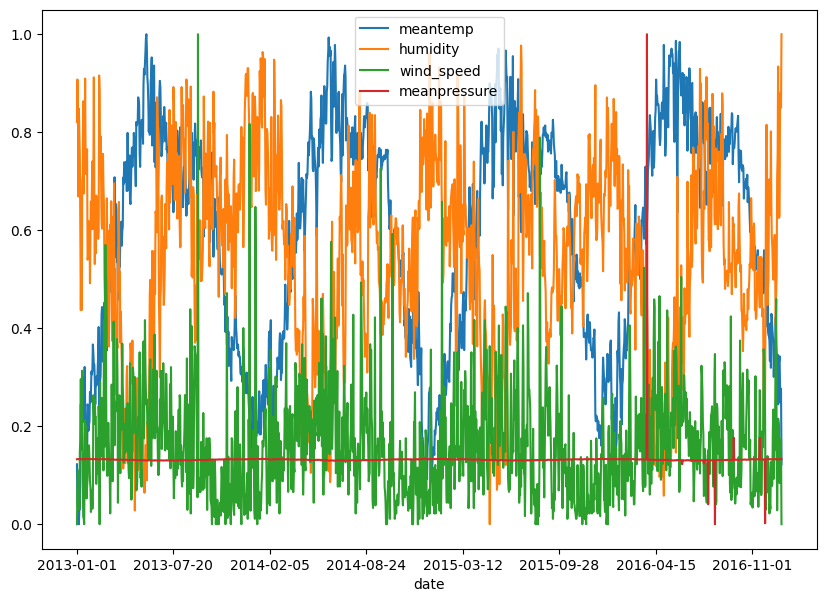

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, datasets
from sklearn.preprocessing import minmax_scale

SEED = 42
BATCH_SIZE = 64
WINDOW = 7
HORIZON = 1

# Load in data
train_df = pd.read_csv("daily-climate-time-series-data/DailyDelhiClimateTrain.csv").set_index(["date"])
test_df = pd.read_csv("daily-climate-time-series-data/DailyDelhiClimateTest.csv").set_index(["date"])

scaled_df = train_df.copy()
scaled_df[["meantemp","humidity", "wind_speed", "meanpressure"]] = minmax_scale(scaled_df[["meantemp","humidity", "wind_speed", "meanpressure"]])
scaled_df.plot(figsize=(10,7))

# Create a subset for temperature univariate forecasting
train_df_sub = pd.DataFrame([train_df["meantemp"]]).transpose()
test_df_sub = pd.DataFrame([test_df["meantemp"]]).transpose()

# Create datasets for univariate forecasting
X_train_sub = train_df_sub.index.to_numpy().astype(np.datetime64)
y_train_sub = train_df_sub["meantemp"].to_numpy().astype(np.float32)
X_test_sub = test_df_sub.index.to_numpy().astype(np.datetime64)
y_test_sub = test_df_sub["meantemp"].to_numpy().astype(np.float32)

# Windowing dataset
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

train_sub_windows, train_sub_labels = make_windows(y_train_sub,
                                                   window_size=WINDOW,
                                                   horizon=HORIZON)

test_sub_windows, test_sub_labels = make_windows(y_test_sub,
                                                 window_size=WINDOW,
                                                 horizon=HORIZON)

train_sub = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(train_sub_windows),
                                 tf.data.Dataset.from_tensor_slices(train_sub_labels))).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_sub = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(test_sub_windows),
                                tf.data.Dataset.from_tensor_slices(test_sub_labels))).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

m = f"""Dataset info
Type
X (timesteps): {X_train_sub.dtype}
y (meantemp): {y_train_sub.dtype}

Shape:
X_train_sub: {X_train_sub.shape}
y_train_sub: {y_train_sub.shape}
train_sub_windows: {train_sub_windows.shape}
train_sub_labels: {train_sub_labels.shape}

X_test_sub: {X_test_sub.shape}
y_test_sub: {y_test_sub.shape}
test_sub_windows: {test_sub_windows.shape}
test_sub_labels: {test_sub_labels.shape}"""
print(m)

In [55]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Mean temperature")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

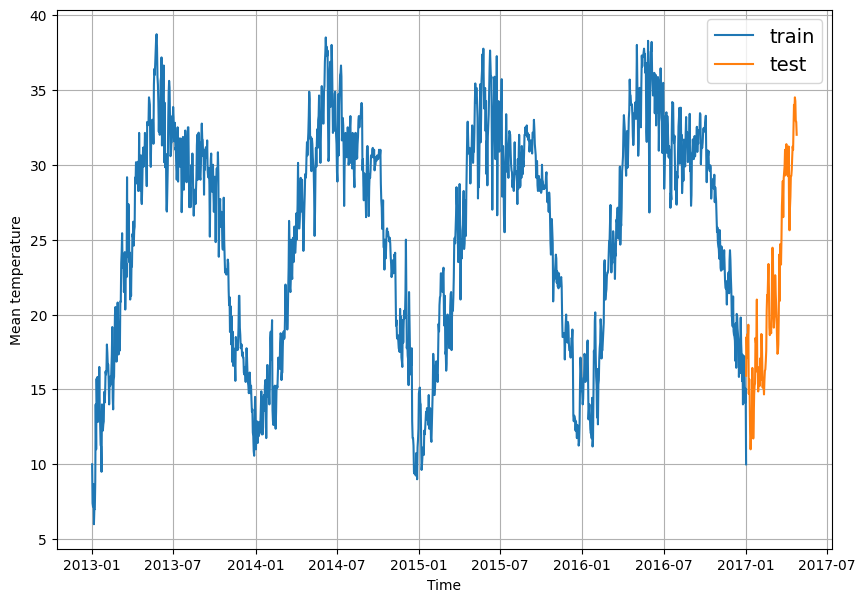

In [7]:
plt.figure(figsize=(10,7))
plot_time_series(X_train_sub, y_train_sub, label="train", format="-")
plot_time_series(X_test_sub, y_test_sub, label="test", format="-")

In [4]:
# Windowing datasets for multivariate forecasting
train_df_windowed = train_df.copy()
test_df_windowed = test_df.copy()

for i in range(WINDOW):
  train_df_windowed[f"meantemp+{i+1}"] = \
  train_df_windowed["meantemp"].shift(periods=i+1)
  test_df_windowed[f"meantemp+{i+1}"] = \
  test_df_windowed["meantemp"].shift(periods=i+1)

# Create multivariate datasets
X_train = train_df_windowed.dropna().drop(["meantemp"], axis=1).astype(np.float32)
y_train = train_df_windowed.dropna()["meantemp"].astype(np.float32)
X_test = test_df_windowed.dropna().drop(["meantemp"], axis=1).astype(np.float32)
y_test = test_df_windowed.dropna()["meantemp"].astype(np.float32)

m = f"""Dataset info
Shape:
X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}"""
print(m)

train = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(X_train),
                             tf.data.Dataset.from_tensor_slices(y_train))).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(X_test),
                            tf.data.Dataset.from_tensor_slices(y_test))).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Dataset info
Shape:
X_train: (1455, 10)
y_train: (1455,)

X_test: (107, 10)
y_test: (107,)


### Train, tune and use time series, sequence and prediction models.

In [9]:
inputs = layers.Input(shape=(WINDOW,), name="input_layer")
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON, activation="linear", name="output_layer")(x)
model_14 = tf.keras.Model(inputs, outputs, name="model_14")

tf.random.set_seed(SEED)
model_14.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])
model_14_history = model_14.fit(train_sub,
                                validation_data=test_sub,
                                epochs=100,
                                verbose=0)
model_14.summary()

2024-02-07 19:56:11.050961: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-07 19:56:11.193937: I external/local_xla/xla/service/service.cc:168] XLA service 0x79de75d8fbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-07 19:56:11.193961: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-07 19:56:11.199094: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-07 19:56:11.215222: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1707353771.290030  129836 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model_14.evaluate(test_sub)

2/2 [==============================] - 0s 3ms/step - loss: 1.2805 - mae: 1.2805


[1.280524730682373, 1.280524730682373]

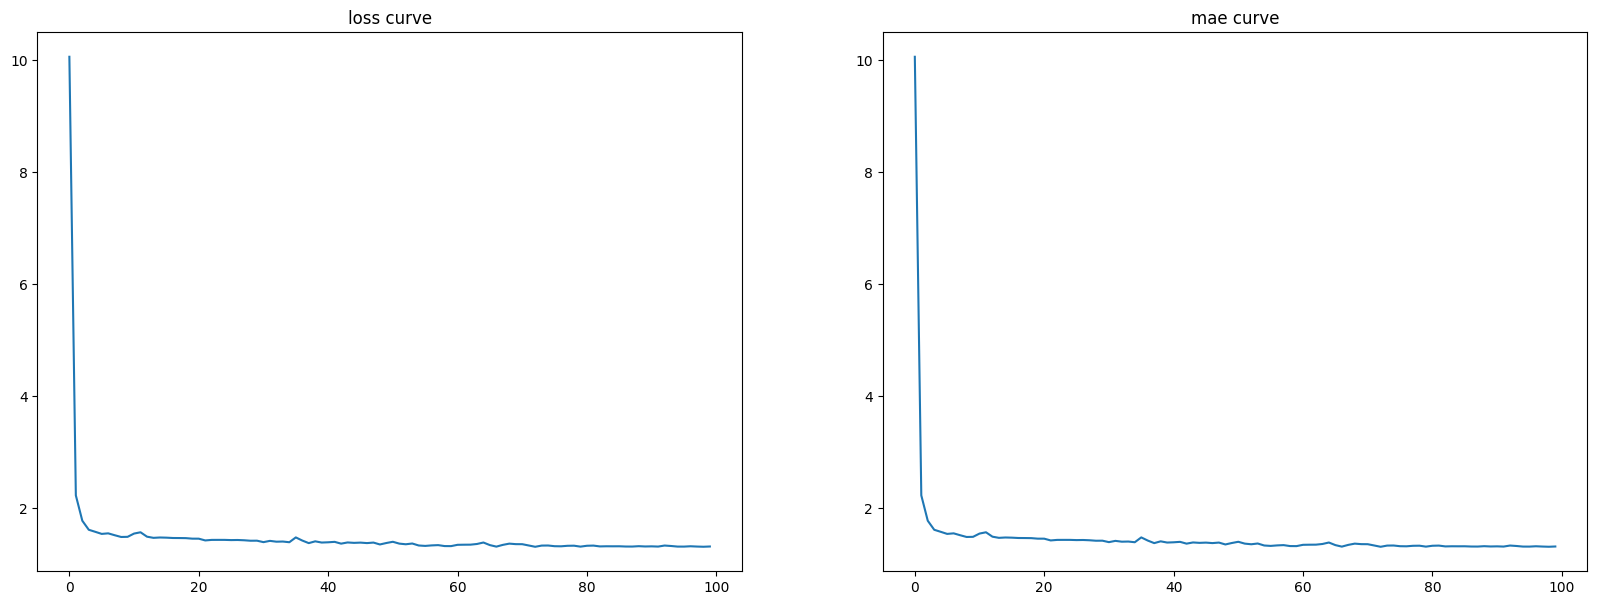

In [11]:
plot_loss_metrics_curves(model_14_history, "mae")

2/2 [==============================] - 0s 3ms/step


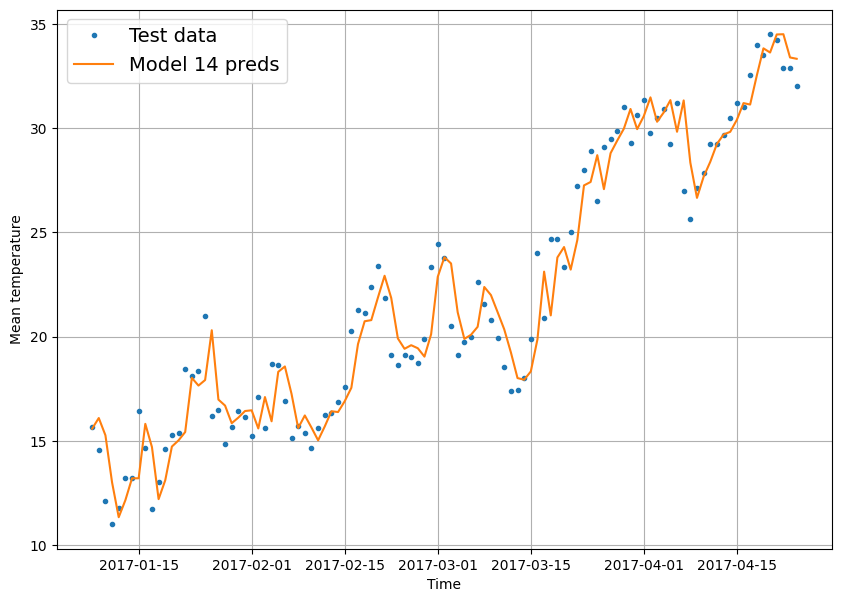

In [12]:
model_14_preds = tf.squeeze(model_14.predict(test_sub))
plt.figure(figsize=(10,7))
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 y_test_sub[-len(test_sub_windows):], label="Test data")
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 model_14_preds, label="Model 14 preds", format="-")

### Train models to predict values for both univariate and multivariate time series

In [14]:
inputs = layers.Input(shape=(WINDOW+3,), name="input_layer")
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON, activation="linear", name="output_layer")(x)
model_15 = tf.keras.Model(inputs, outputs, name="model_15")

tf.random.set_seed(SEED)
model_15.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])
model_15_history = model_15.fit(train,
                                validation_data=test,
                                epochs=100,
                                verbose=0)
model_15.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model_15.evaluate(test)

2/2 [==============================] - 0s 3ms/step - loss: 3.0767 - mae: 3.0767


[3.0766961574554443, 3.0766961574554443]

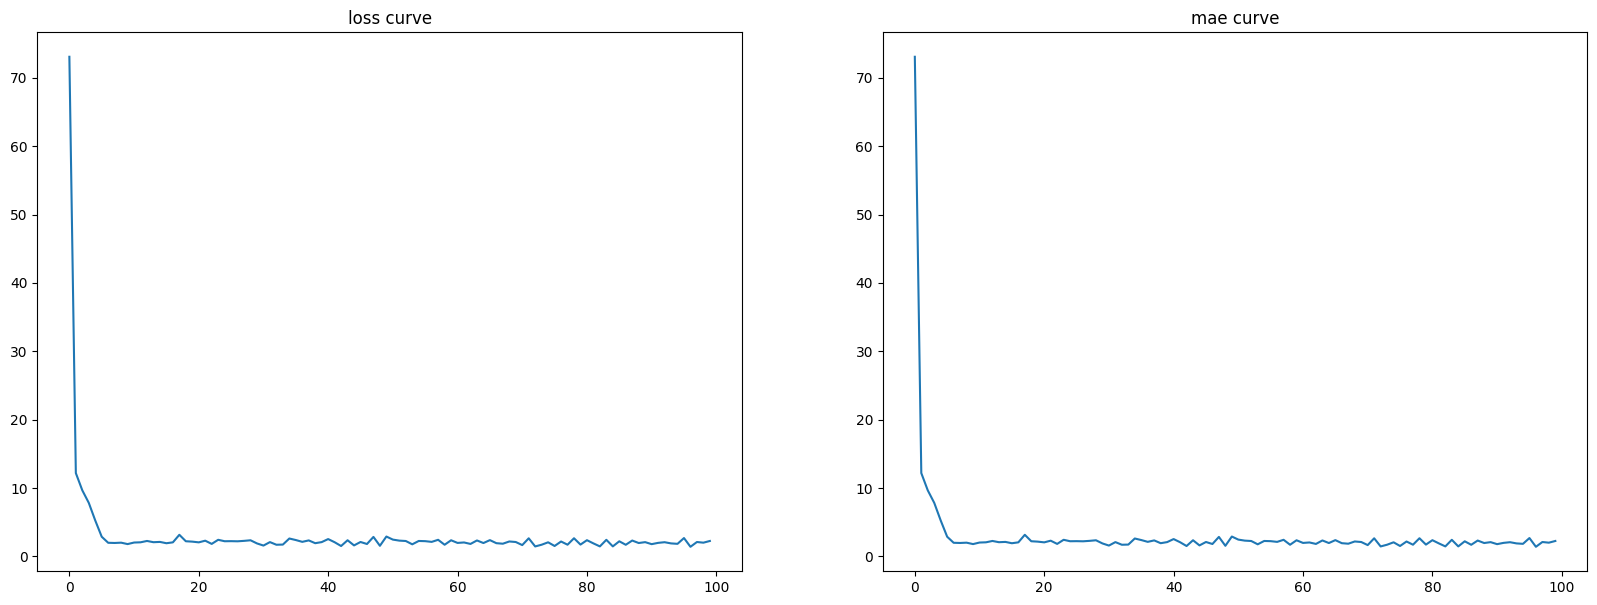

In [16]:
plot_loss_metrics_curves(model_15_history, "mae")

2/2 [==============================] - 0s 2ms/step


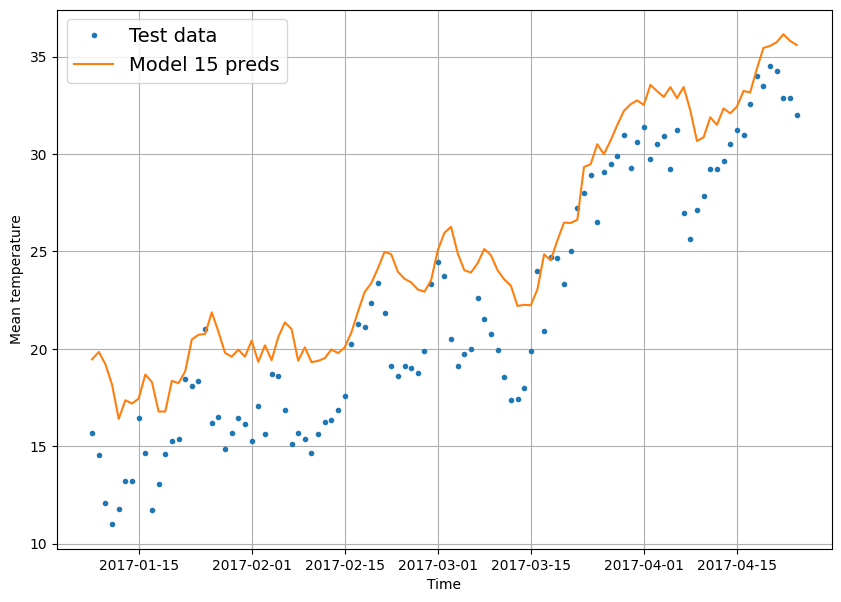

In [17]:
model_15_preds = tf.squeeze(model_15.predict(test))
plt.figure(figsize=(10,7))
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 y_test_sub[-len(test_sub_windows):], label="Test data")
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 model_15_preds, label="Model 15 preds", format="-")

### Use RNNs and CNNs for time series, sequence and forecasting models.

In [45]:
import numpy as np

def create_multivariate_ts_data(df, n_features, time_steps):
    """
    Transform a DataFrame into input-output pairs suitable for training an LSTM model
    for multivariate time series forecasting.

    Parameters:
    df (DataFrame): Input DataFrame containing the time series data.
    n_features (int): Number of features in the multivariate time series.
    time_steps (int): Number of time steps (window size) for each input sample.

    Returns:
    X_train (ndarray): Input data for training with shape (num_samples, time_steps, n_features).
    y_train (ndarray): Output data for training with shape (num_samples, n_features).
    """

    num_samples = len(df) - time_steps
    X_train = []
    y_train = []

    for i in range(num_samples):
        X_sample = df.iloc[i:i+time_steps, :n_features].values
        y_sample = df.iloc[i+time_steps, :n_features].values
        X_train.append(X_sample)
        y_train.append(y_sample)

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    return X_train, y_train

X_train_lstm, y__train_lstm = create_multivariate_ts_data(train_df, 3, 7)
X_test_lstm, y__test_lstm = create_multivariate_ts_data(test_df, 3, 7)

In [47]:
inputs = layers.Input(shape=(7,3), name="input_layer")
x = layers.LSTM(256, activation="relu")(inputs)
outputs = layers.Dense(HORIZON, name="output_layer")(x)
model_16 = tf.keras.Model(inputs, outputs, name="model_16")

tf.random.set_seed(SEED)
model_16.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])
model_16_history = model_16.fit(X_train_lstm, y__train_lstm,
                                validation_data=(X_test_lstm, y__test_lstm),
                                epochs=100,
                                verbose=0)
model_16.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 3)]            0         
                                                                 
 lstm_21 (LSTM)              (None, 256)               266240    
                                                                 
 output_layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 266497 (1.02 MB)
Trainable params: 266497 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model_16.evaluate(X_test_lstm, y__test_lstm)

4/4 [==============================] - 0s 3ms/step - loss: 16.2798 - mae: 16.2798


[16.279773712158203, 16.279773712158203]

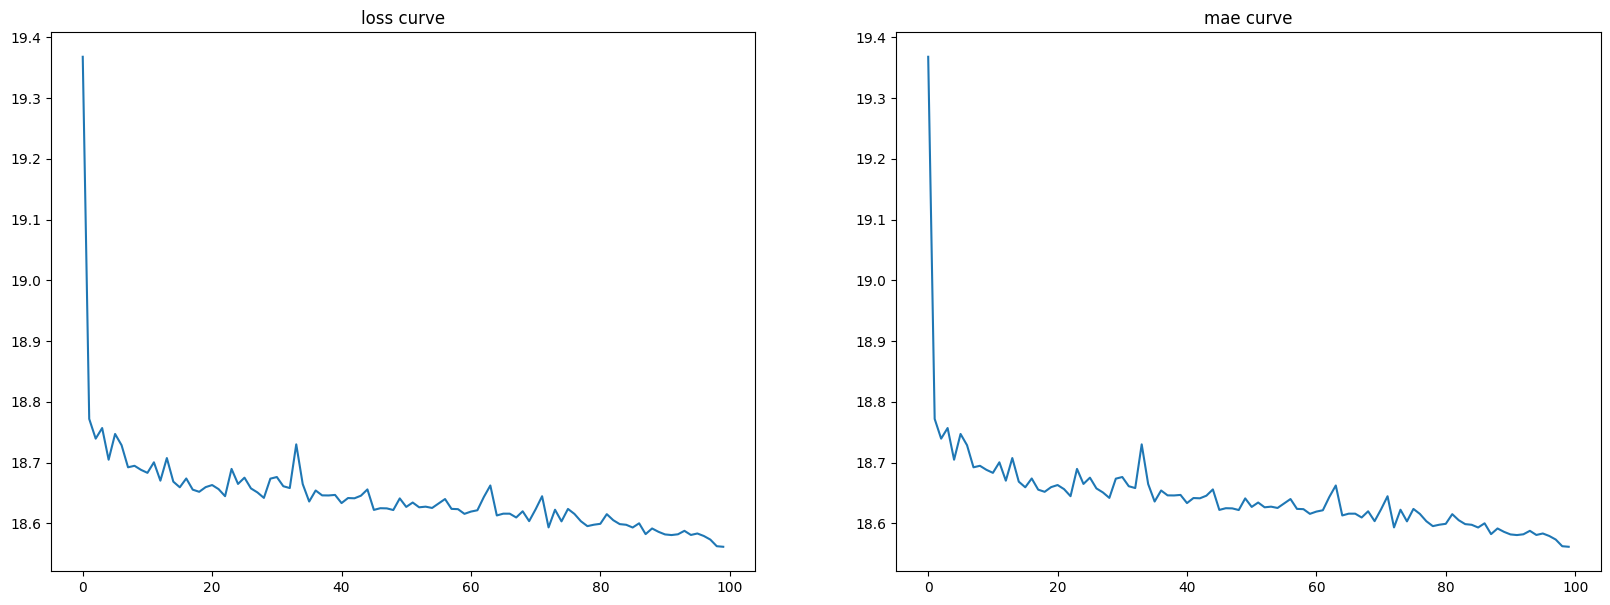

In [51]:
plot_loss_metrics_curves(model_16_history, "mae")

4/4 [==============================] - 0s 2ms/step


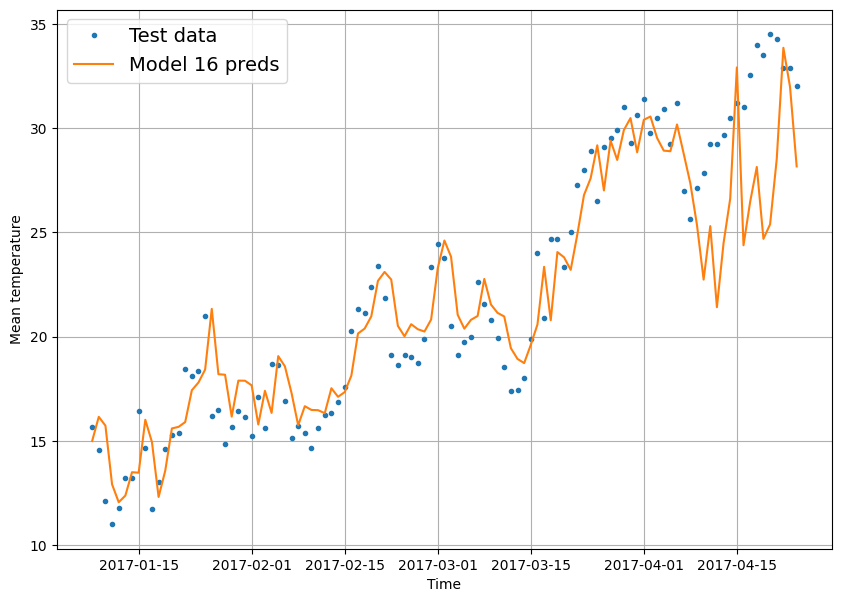

In [56]:
model_16_preds = tf.squeeze(model_16.predict(X_test_lstm))
plt.figure(figsize=(10,7))
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 y_test_sub[-len(test_sub_windows):], label="Test data")
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 model_16_preds, label="Model 16 preds", format="-")

### Adjust the learning rate dynamically in time series, sequence and prediction model

In [58]:
inputs = layers.Input(shape=(WINDOW+3,), name="input_layer")
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON, activation="linear", name="output_layer")(x)
model_17 = tf.keras.Model(inputs, outputs, name="model_15")

tf.random.set_seed(SEED)
model_17.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

model_17_history = model_17.fit(train,
                                validation_data=test,
                                epochs=100,
                                verbose=0,
                                callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])
model_17.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model_17.evaluate(test)

2/2 [==============================] - 0s 4ms/step - loss: 1.8836 - mae: 1.8836


[1.883622169494629, 1.883622169494629]

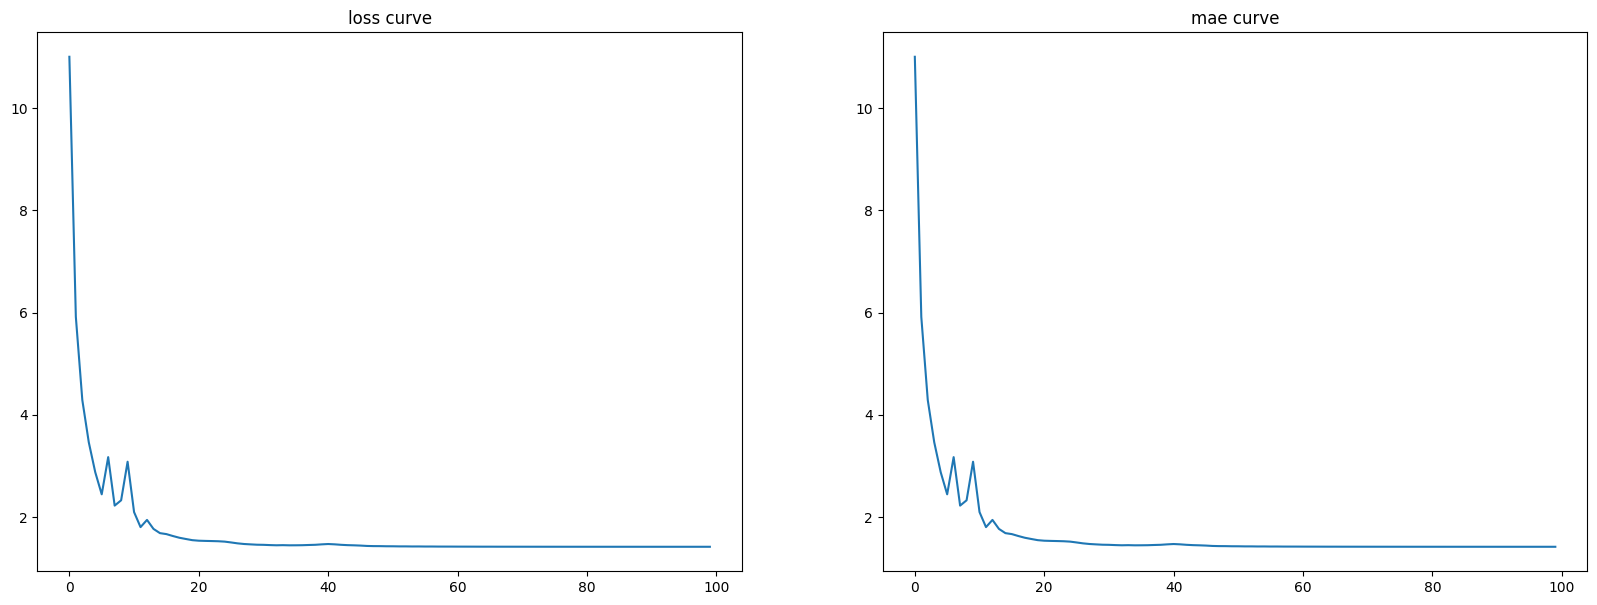

In [59]:
plot_loss_metrics_curves(model_17_history, "mae")

2/2 [==============================] - 0s 2ms/step


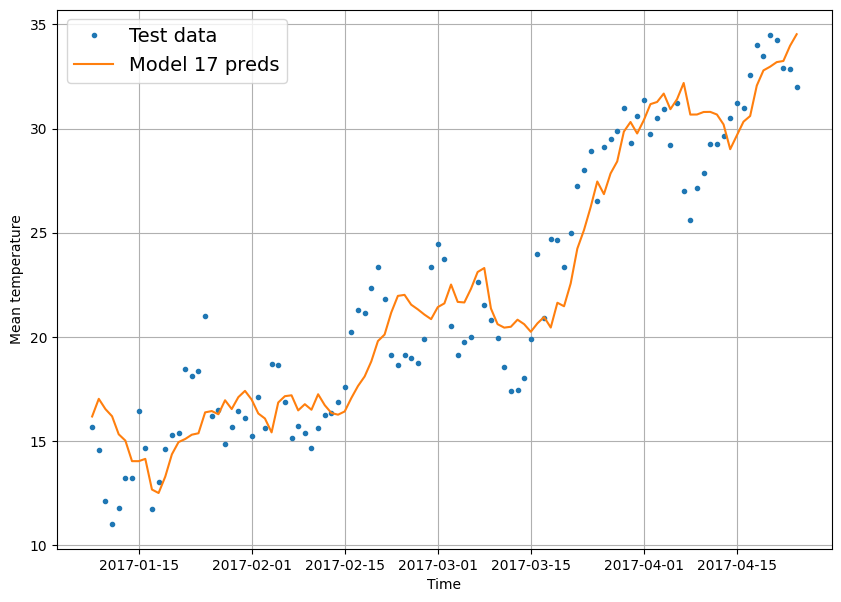

In [61]:
model_17_preds = tf.squeeze(model_17.predict(test))
plt.figure(figsize=(10,7))
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 y_test_sub[-len(test_sub_windows):], label="Test data")
plot_time_series(X_test_sub[-len(test_sub_windows):],
                 model_17_preds, label="Model 17 preds", format="-")